### importing libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

### reading the csv

In [4]:
sms = pd.read_csv('spam.csv',encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###  dropping the unwanted columns and renaming the remaining columns

In [5]:
cols_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
sms.drop(cols_to_drop,axis=1,inplace=True)
sms.columns = ['label','message']

In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
sms.isnull().sum()

label      0
message    0
dtype: int64

### converting words into vectors and splitting data into train/test

In [16]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(sms['message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['label'], test_size=0.3, random_state=101)

## training the model (I also tried Tfidf Vectorizer but in this case CountVectorizer is giving better results)

In [17]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)

training accuracy is -->  99.41025641025641
test accuracy is -->  98.56459330143541


In [18]:
def visualize(label):
    words = ''
    for msg in sms[sms['label']==label]['message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

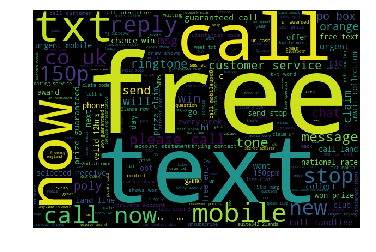

In [19]:
visualize('spam')

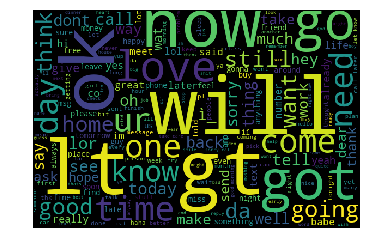

In [20]:
visualize('ham')

### live predictor 

In [22]:
# just type in your message and run
your_message = 'You are the lucky winner for the lottery price of $6million.'
your_message = cv.transform([your_message])
claass = mnb.predict(your_message)
print(claass[0])

spam
